## This notebook demonstrate data manipulation and interactive dashboard constructing
We will analyze the data of Kickstarter, a crowdfunding platform that aims to "help bring creative projects to life".  
The data was originally from https://www.kaggle.com/datasets/kemical/kickstarter-projects?resource=download.

In [1]:
# !pip install panel hvplot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

import seaborn as sns
import holoviews as hv
import hvplot.pandas
import panel as pn
pn.extension()
hv.extension('bokeh')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data_df = pd.read_csv('G:/My Drive/UMN Courses/6411/kickstarter.csv')
data_df

,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,2015-08-11 12:12:28,2015-10-09,1000.0,0.0,failed,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,2017-09-02 04:43:57,2017-11-01,30000.0,2421.0,failed,15,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,US,USD,2013-01-12 00:20:50,2013-02-26,45000.0,220.0,failed,3,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,2012-03-17 03:24:11,2012-04-16,5000.0,1.0,failed,1,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,2015-07-04 08:35:03,2015-08-29,19500.0,1283.0,canceled,14,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,US,USD,2014-09-17 02:35:30,2014-10-17,50000.0,25.0,canceled,1,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,US,USD,2011-06-22 03:35:14,2011-07-19,1500.0,155.0,failed,5,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,US,USD,2010-07-01 19:40:30,2010-08-16,15000.0,20.0,failed,1,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,US,USD,2016-01-13 18:13:53,2016-02-13,15000.0,200.0,failed,6,200.0,15000.00


### 1. Format
1. change the format of columns, ``launched`` and ``deadline``, to datetime  
2. generate new columns to represent the ``year`` and ``month`` during which the project was ``launched``

In [3]:
# see the row number
data_df.shape[0]

378661

In [4]:
# first check the data type
data_df.dtypes

ID                    int64
name                 object
category             object
main_category        object
country              object
currency             object
launched             object
deadline             object
goal                float64
pledged             float64
state                object
backers               int64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

"launched" and "deadline" are object in data type; convert them into datetime

In [5]:
data_df['launched'] = pd.to_datetime(data_df['launched'], format='%Y-%m-%d %H:%M:%S')
data_df['deadline'] = pd.to_datetime(data_df['deadline'], format='%Y-%m-%d')

After converting, check the data type again

In [6]:
data_df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
country                     object
currency                    object
launched            datetime64[ns]
deadline            datetime64[ns]
goal                       float64
pledged                    float64
state                       object
backers                      int64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [7]:
# generate new columns to of 'year' and 'month' for launched
data_df['year'] = data_df['launched'].dt.year
data_df['month'] = data_df['launched'].dt.month

In [8]:
data_df.head()

,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,year,month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,2015-08-11 12:12:28,2015-10-09,1000.0,0.0,failed,0,0.0,1533.95,2015,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,2017-09-02 04:43:57,2017-11-01,30000.0,2421.0,failed,15,2421.0,30000.00,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,US,USD,2013-01-12 00:20:50,2013-02-26,45000.0,220.0,failed,3,220.0,45000.00,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,2012-03-17 03:24:11,2012-04-16,5000.0,1.0,failed,1,1.0,5000.00,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,2015-07-04 08:35:03,2015-08-29,19500.0,1283.0,canceled,14,1283.0,19500.00,2015,7


### 2. Noisy data
1. find out data with noisy launched time, and  
2. decide whether want to fix the noise or remove the noise

I plot 4 numerical variables against launched year to see if there's noisy launched time

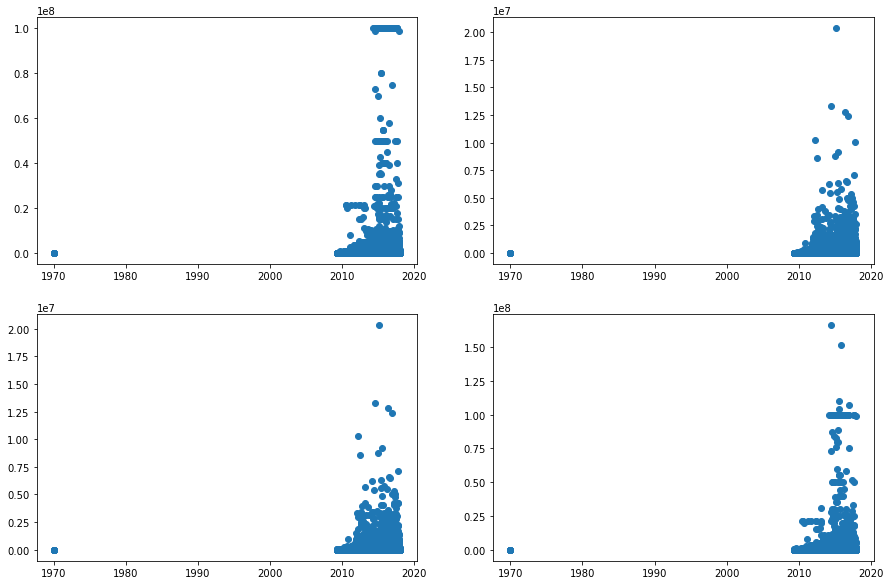

In [9]:
fig = plt.figure(figsize = (15, 10)) # using subplot
ax1 = fig.add_subplot(221) # subplot(nrows, ncols, index)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(data_df.launched, data_df.goal)
ax2.scatter(data_df.launched, data_df.pledged)
ax3.scatter(data_df.launched, data_df.usd_pledged_real)
ax4.scatter(data_df.launched, data_df.usd_goal_real)

In [10]:
# see how many rows has launched year in 1970
data_df[data_df.launched.dt.year == 1970].shape[0]

7

It seems that data with "launched" in 1970 is a noise; it's so weird that 1970 has 0 in all the 4 numerical variables  
So I decided to remove them

In [11]:
data_df = data_df[data_df.launched.dt.year != 1970]

# reset the index
data_df.reset_index(drop = True, inplace = True)

Then check again the row number, should be 378661-7=378654

In [12]:
data_df.shape[0]

378654

### 3. Success rate
1. Create a figure with two subplots (one column two rows) sharing  
2. Subplot 1: Use line chart to visualize the average success rate of projects (i.e., annual success rate) across years until 2017 (in other words, x-axis: year, y-axis: success rate) 
3. Subplot 2: Use a bar plot to display the number of projects per year (until 2017) 

In [13]:
# count number of all outcomes
total_outcome = data_df.groupby(data_df.launched.dt.year).state.value_counts().reset_index()
total_outcome_num = total_outcome.groupby(total_outcome.launched).sum().reset_index()
total_outcome_num = total_outcome_num[total_outcome_num.launched != 2018] # only need until 2017
total_outcome_num = pd.DataFrame(total_outcome_num)[['launched', 'count']]
total_outcome_num = total_outcome_num.set_index('launched')

# count number of successful outcomes
succ_outcome = data_df[data_df.state == 'successful']
succ_outcome_num = succ_outcome.groupby(succ_outcome.launched.dt.year).state.value_counts().reset_index()
succ_outcome_num = pd.DataFrame(succ_outcome_num)[['launched', 'count']]
succ_outcome_num = succ_outcome_num.set_index('launched')

print('total outcomes:')
total_outcome_num.head()
print('\nsuccessful outcomes:')
succ_outcome_num.head()

total outcomes:


,count
launched,
2009,1329
2010,10519
2011,26237
2012,41165
2013,44851



successful outcomes:


,count
launched,
2009,579
2010,4593
2011,12171
2012,17892
2013,19415


In [14]:
# get the success rate
succ_rate = (succ_outcome_num[['count']] / total_outcome_num[['count']])
print(succ_rate)

             count
launched          
2009      0.435666
2010      0.436638
2011      0.463887
2012      0.434641
2013      0.432878
2014      0.311565
2015      0.271294
2016      0.328169
2017      0.353678


<BarContainer object of 9 artists>

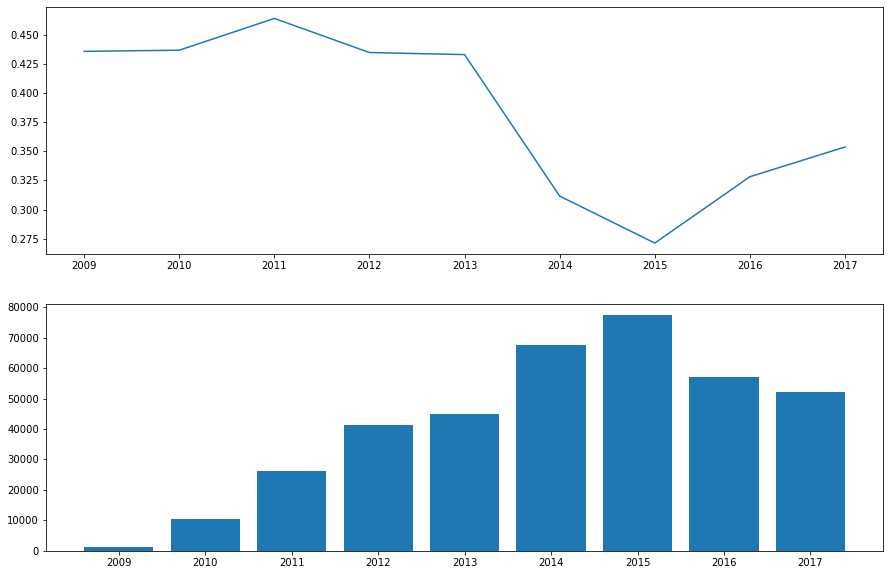

In [15]:
fig2 = plt.figure(figsize = (15, 10)) # using subplot
ax1 = fig2.add_subplot(211) # subplot(nrows, ncols, index)
ax2 = fig2.add_subplot(212)

# sub plot 1
# succ_rate = succ_rate['count']
ax1.plot(succ_rate)

# sub plot 2
year = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
project_num = total_outcome_num['count']
ax2.bar(year, height = project_num)

In [16]:
project_num = pd.DataFrame(np.c_[total_outcome_num, succ_outcome_num])
project_num.columns = ['total', 'success']
project_num

,total,success
0,1329,579
1,10519,4593
2,26237,12171
3,41165,17892
4,44851,19415
5,67745,21107
6,77300,20971
7,57184,18766
8,52200,18462


I want to create other 2 columns indicating whether a project is successful or not, since I will use it in Exercise 5

In [17]:
data_df['is_success'] = np.where(data_df['state'] == 'successful', 1, 0)
data_df['all'] = np.where(data_df['state'] != ' ', 1, 1)
data_df.head()

<ipython-input-17-a780b503db1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['is_success'] = np.where(data_df['state'] == 'successful', 1, 0)
<ipython-input-17-a780b503db1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['all'] = np.where(data_df['state'] != ' ', 1, 1)


,ID,name,category,main_category,country,currency,launched,deadline,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,year,month,is_success,all
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GB,GBP,2015-08-11 12:12:28,2015-10-09,1000.0,0.0,failed,0,0.0,1533.95,2015,8,0,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,US,USD,2017-09-02 04:43:57,2017-11-01,30000.0,2421.0,failed,15,2421.0,30000.00,2017,9,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,US,USD,2013-01-12 00:20:50,2013-02-26,45000.0,220.0,failed,3,220.0,45000.00,2013,1,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,USD,2012-03-17 03:24:11,2012-04-16,5000.0,1.0,failed,1,1.0,5000.00,2012,3,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,USD,2015-07-04 08:35:03,2015-08-29,19500.0,1283.0,canceled,14,1283.0,19500.00,2015,7,0,1


### 4. Hypothesis and exploration

What hypothesis do you have for why success rate varies across years?  
Use a visualization to show preliminary results examining your hypothesis

#### Specifiy the hypothesis here: 
H0: annual success rates are the same  
H1: annual success rates are not the same

#### Visualization

In [18]:
# first get a dataframe of difference in success rate from 2010-2009 to 2017-2016

diff_succ_rate = []

for i in range(1, 9):
    diff = succ_rate.unstack().iloc[i] - succ_rate.unstack().iloc[i-1]
    diff_succ_rate.append(diff)

diff_succ_rate = pd.DataFrame(diff_succ_rate)
diff_succ_rate['launched'] = ['2010-2009', '2011-2010', '2012-2011', '2013-2012', '2014-2013', '2015-2014', '2016-2015', '2017-2016']
diff_succ_rate.head()

,0,launched
0,0.000973,2010-2009
1,0.027248,2011-2010
2,-0.029246,2012-2011
3,-0.001763,2013-2012
4,-0.121312,2014-2013


<Figure size 576x432 with 0 Axes>

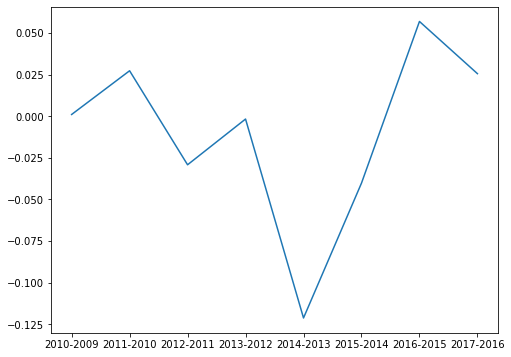

In [19]:
# then visualize

plt.figure(figsize = (8, 6))
x = np.array(diff_succ_rate.launched)
y = np.array(diff_succ_rate.iloc[:, [0]])
plt.plot(x, y)

Note that the maginitude of y-axis is actually quite small, just from -0.125 to 0.05

### 5. Dashboard

Build an interactive dashboard following the requirements below:
1. Could choose from one of the three countries: US, France (FR), United Kingdom of Great Britain and Northern Ireland (GB) _(tip: to use RadioButtonGroup)
2. Has a slider to choose the year of the visualization _(tip: to use IntSlider)
3. Could choose to visualize either the number of projects or the number of success projects (as y_axis) _(tip: to use RadioButtonGroup)
4. Has a line chart to visualize the y-axis across months of the year

In [20]:
# define environment and import packages
def environment():
    try:
        get_ipython()
        print('notebook')
        return str(get_ipython())
    except:
        print('server')
        return 'server'

env = environment()

if env=="server":
   theme="fast"
else:
   theme="simple"

# if 'google.colab' in env:
#     print('Running on CoLab')
#     !pip install panel hvplot

notebook


In [21]:
# import related packages
# import panel as pn
pn.extension('tabulator', sizing_mode="stretch_width")
# import hvplot.pandas
# import holoviews as hv
hv.extension('bokeh')

#### Generate an interactive dashboard

In [22]:
### get interactive dataframe
idf = data_df.interactive()

In [23]:
# define a filter, it will be indicated in color in the final dashboard

# radioButtonGroup: can only choose one value
choose_country = pn.widgets.RadioButtonGroup(name='Choose a Country', options=['US', 'FR', 'GB'], button_type='success')
# choose_country.show()
choose_country

RadioButtonGroup(button_type='success', name='Choose a Country', options=['US', 'FR', 'GB'], sizing_mode='stretch_width', value='US')

In [24]:
# define a slider

sld_year = pn.widgets.IntSlider(name = 'year', start = 2009, end = 2017, step = 1, value = 2013)
# sld_year.show()
sld_year

IntSlider(end=2017, name='year', sizing_mode='stretch_width', start=2009, value=2013)

In [25]:
# define a filter

y_axis = pn.widgets.RadioButtonGroup(name='Choose a Project Type', options=['all', 'is_success'], button_type='success')
# y_axis.show()
y_axis

RadioButtonGroup(button_type='success', name='Choose a Project Type', options=['all', 'is_success'], sizing_mode='stretch_width', value='all')

In [26]:
# pipe

ipipeline = (
    idf[ # idf is the interactive dataframe
        (idf.year == sld_year) # the slider
         & (idf.country.isin(['US', 'FR', 'GB']))
    ]
    .groupby(['month', 'country'])[y_axis].sum() # since I labeled them as 1
    .to_frame()
    .reset_index()
    .sort_values(by = 'month')
    .reset_index(drop=True)
)
ipipeline.head(20)

In [27]:
# pipe the ineractive dashboard to plot
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0"]
ihvplot = ipipeline.hvplot(x='month', y=y_axis, by = 'country', color=PALETTE, line_width=4, height=400)
ihvplot

In [28]:
dashboard = pn.Column(
    pn.Row(
        choose_country, sld_year, y_axis
    ),
    ihvplot.panel()
)
dashboard.servable()

Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] RadioButtonGroup(button_type='success', name='Choose a Country', options=['US', 'FR', 'GB'], sizing_mode='stretch_width', value='US')
        [1] IntSlider(end=2017, name='year', sizing_mode='stretch_width', start=2009, value=2013)
        [2] RadioButtonGroup(button_type='success', name='Choose a Project Type', options=['all', 'is_success'], sizing_mode='stretch_width', value='all')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, sizing_mode='stretch_width')

### Note that the dashboard would be present in the html file